In [84]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('happiness_score_dataset.csv')

In [4]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [6]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [7]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [51]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [52]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [12]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [15]:
cols = df[['Happiness Rank', 'Happiness Score','Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]

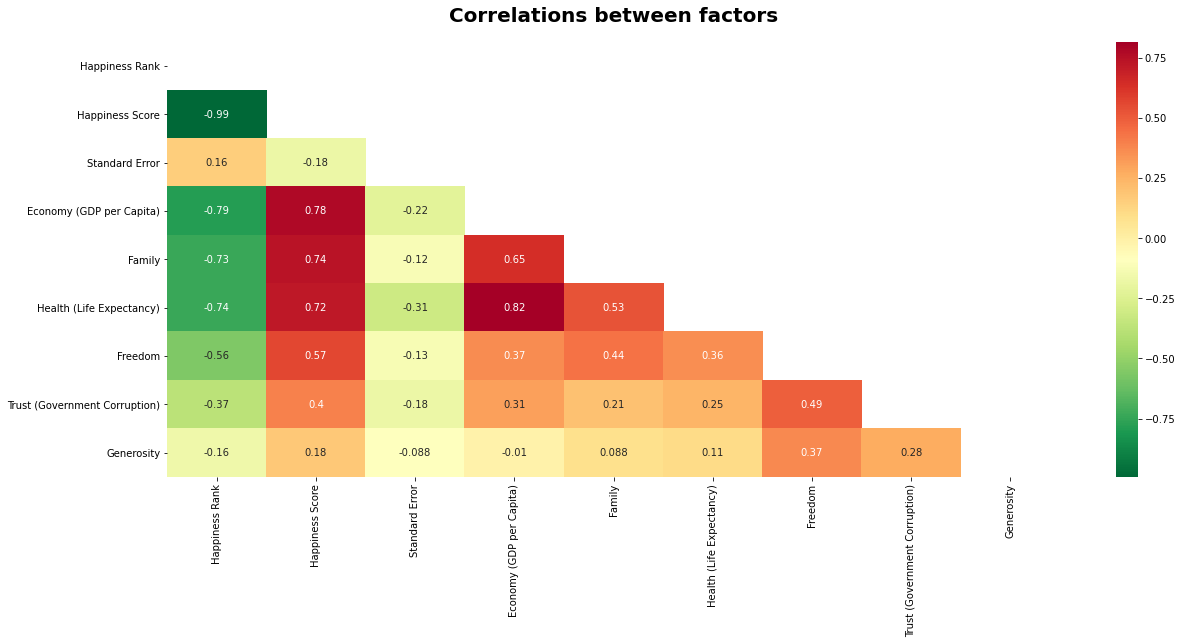

In [18]:
plt.figure(figsize=(20, 8))
sns.heatmap(cols.corr(), annot = True, cmap='RdYlGn_r', mask=np.triu(np.ones_like(cols.corr())));
plt.title('Correlations between factors', fontsize=20, fontweight='bold', pad=20);

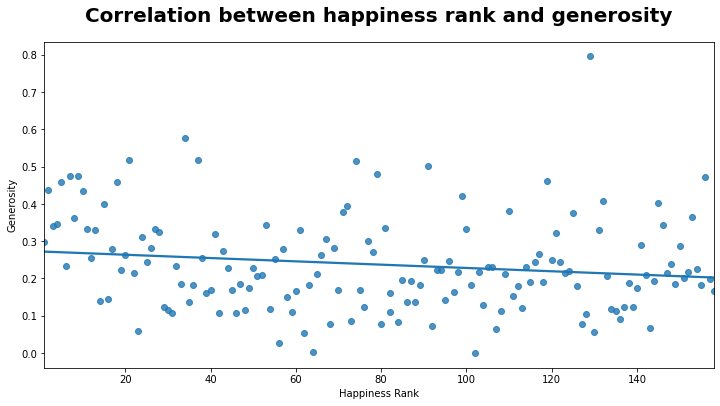

In [21]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Happiness Rank', y='Generosity', data=df, ci=None);
plt.title('Correlation between happiness rank and generosity', fontsize=20, fontweight='bold', pad=20);

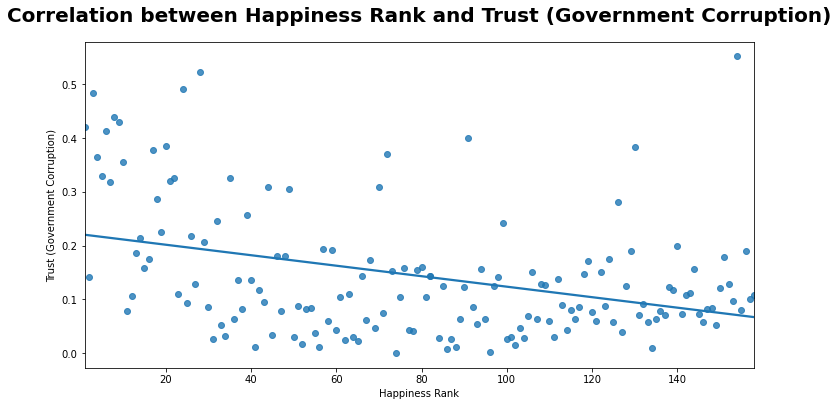

In [27]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Happiness Rank', y='Trust (Government Corruption)', data=df, ci=None);
plt.title('Correlation between Happiness Rank and Trust (Government Corruption)', fontsize=20, fontweight='bold', pad=20);

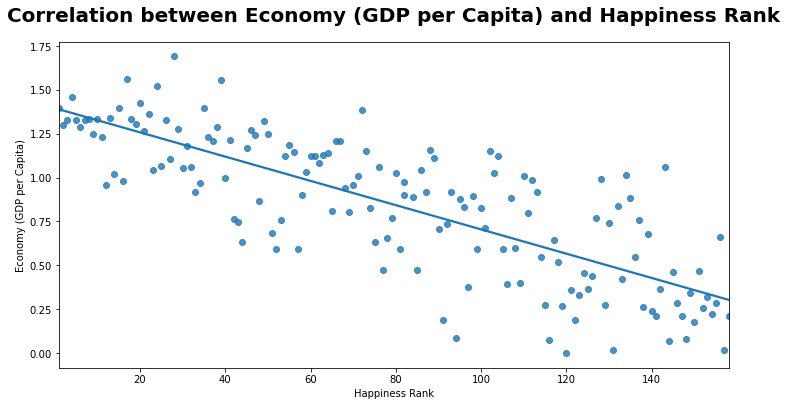

In [30]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Happiness Rank', y='Economy (GDP per Capita)', data=df, ci=None);
plt.title('Correlation between Economy (GDP per Capita) and Happiness Rank', fontsize=20, fontweight='bold', pad=20);

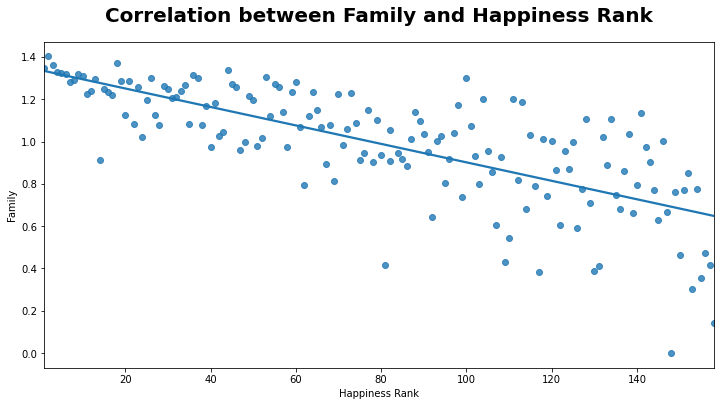

In [39]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Happiness Rank', y='Family', data=df, ci=None);
plt.title('Correlation between Family and Happiness Rank', fontsize=20, fontweight='bold', pad=20);

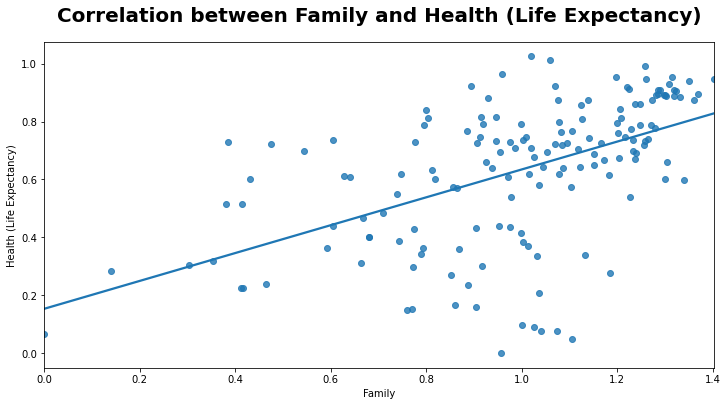

In [36]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Family', y='Health (Life Expectancy)', data=df, ci=None);
plt.title('Correlation between Family and Health (Life Expectancy)', fontsize=20, fontweight='bold', pad=20);

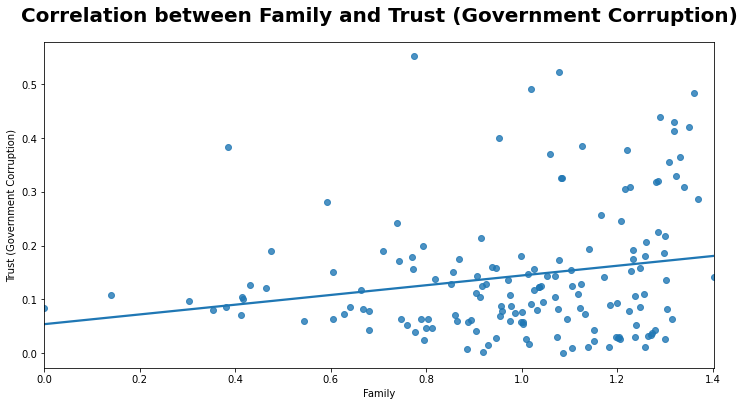

In [40]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Family', y='Trust (Government Corruption)', data=df, ci=None);
plt.title('Correlation between Family and Trust (Government Corruption)', fontsize=20, fontweight='bold', pad=20);

<AxesSubplot:ylabel='Frequency'>

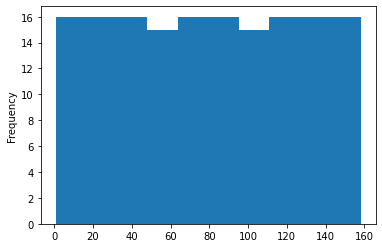

In [54]:
df['Happiness Rank'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

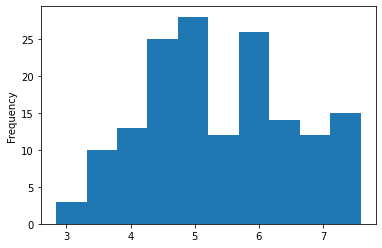

In [55]:
df['Happiness Score'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

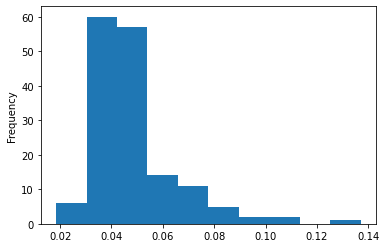

In [56]:
df['Standard Error'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

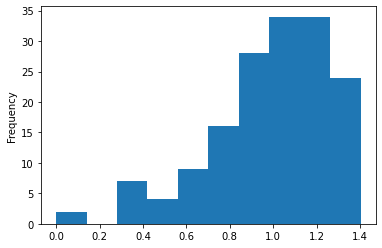

In [62]:
df['Family'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

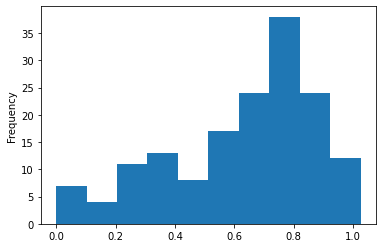

In [66]:
df['Health (Life Expectancy)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

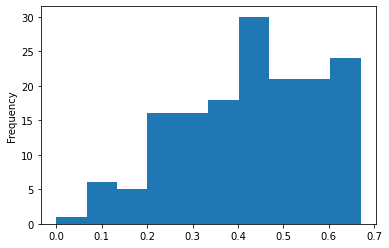

In [67]:
df['Freedom'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

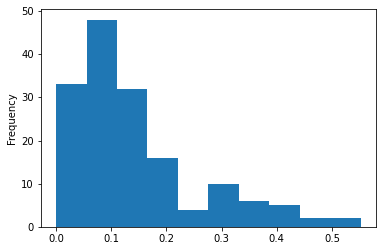

In [69]:
df['Trust (Government Corruption)'].plot.hist()

In [71]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [72]:
x.head

<bound method NDFrame.head of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.

In [73]:
y.head

<bound method NDFrame.head of 0      2.51738
1      2.70201
2      2.49204
3      2.46531
4      2.45176
        ...   
153    0.67042
154    1.63328
155    0.32858
156    1.83302
157    1.56726
Name: Dystopia Residual, Length: 158, dtype: float64>

In [75]:
x.shape

(158, 11)

In [76]:
y.shape

(158,)

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [78]:
x_train.shape

(105, 11)

In [79]:
y_train.shape

(105,)

In [80]:
x_test.shape

(53, 11)

In [81]:
y_test.shape

(53,)